**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 9**
Regresión Logística

---

EQUIPO 34

NOMBRE: Maria Fernanda Ocampo Nava / MATRÍCULA: A01797420

NOMBRE: Arturo Alejandro Flores Amaro / MATRÍCULA: A01797429

NOMBRE: Joel Arturo Becerril Balderas / MATRÍCULA: A01797427

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/maestria/IA/Tec/Ciencia_de_datos/Semana9_9al15jun/Actividad9"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
data_df = pd.read_csv('data.csv')
data_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# **Parte 1**. EDA

Haz que el `id` sea el índice del dataframe y efectúa una exploración inicial de los datos a través de:

In [46]:
data_df.set_index('id', inplace=True)

In [47]:
data_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820




1a) Estadísticas descriptivas para todas las variables del dataframe.

In [48]:
data_df.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


1b) Valores únicos por variable para identificar posibles variables categóricas.

In [49]:
for col in data_df.columns.to_list():
    print('Variable {}: {}\n'.format(col, data_df[col].unique()[:5]))

Variable diagnosis: ['M' 'B']

Variable radius_mean: [17.99 20.57 19.69 11.42 20.29]

Variable texture_mean: [10.38 17.77 21.25 20.38 14.34]

Variable perimeter_mean: [122.8  132.9  130.    77.58 135.1 ]

Variable area_mean: [1001.  1326.  1203.   386.1 1297. ]

Variable smoothness_mean: [0.1184  0.08474 0.1096  0.1425  0.1003 ]

Variable compactness_mean: [0.2776  0.07864 0.1599  0.2839  0.1328 ]

Variable concavity_mean: [0.3001 0.0869 0.1974 0.2414 0.198 ]

Variable concave points_mean: [0.1471  0.07017 0.1279  0.1052  0.1043 ]

Variable symmetry_mean: [0.2419 0.1812 0.2069 0.2597 0.1809]

Variable fractal_dimension_mean: [0.07871 0.05667 0.05999 0.09744 0.05883]

Variable radius_se: [1.095  0.5435 0.7456 0.4956 0.7572]

Variable texture_se: [0.9053 0.7339 0.7869 1.156  0.7813]

Variable perimeter_se: [8.589 3.398 4.585 3.445 5.438]

Variable area_se: [153.4   74.08  94.03  27.23  94.44]

Variable smoothness_se: [0.006399 0.005225 0.00615  0.00911  0.01149 ]

Variable compactness_se

1c) Búsqueda de valores faltantes.

In [50]:
data_df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


1d) Diagrama de barras para determinar la frecuencia de los diagnósticos (cantidad de observaciones con resultado benigno y maligno)

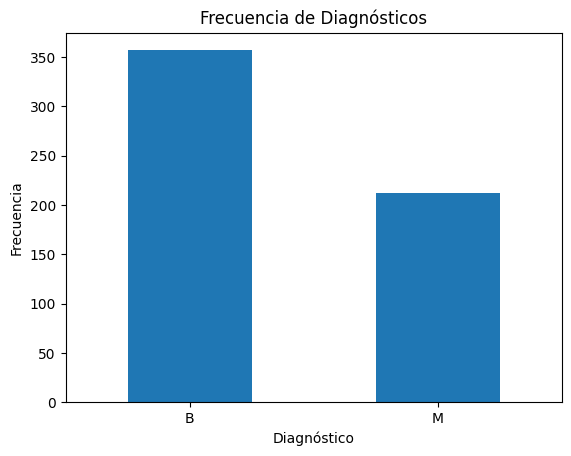

In [51]:
data_df['diagnosis'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Diagnósticos')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0)
plt.show()

2. Como hay tres valores relacionados con la misma característica (`mean`, `se` y `worst`) es muy probable que exista multicolinealidad en el conjunto.

La multicolinealidad en regresión es una condición que ocurre cuando algunas variables predictoras están fuertemente correlacionadas entre sí, de tal manera que si se incluyen simultáneamente en un modelo, impiden explicar de manera correcta el efecto que cada una tiene sobre la variable respuesta. Existen muchas formas de analizar si hay colinealidad en los modelos, una de ellas es el alto coeficiente de correlación entre variables.

Para observar este efecto, elabora un mapa de calor que cuantifique la correlación de las variables numéricas en el dataframe.

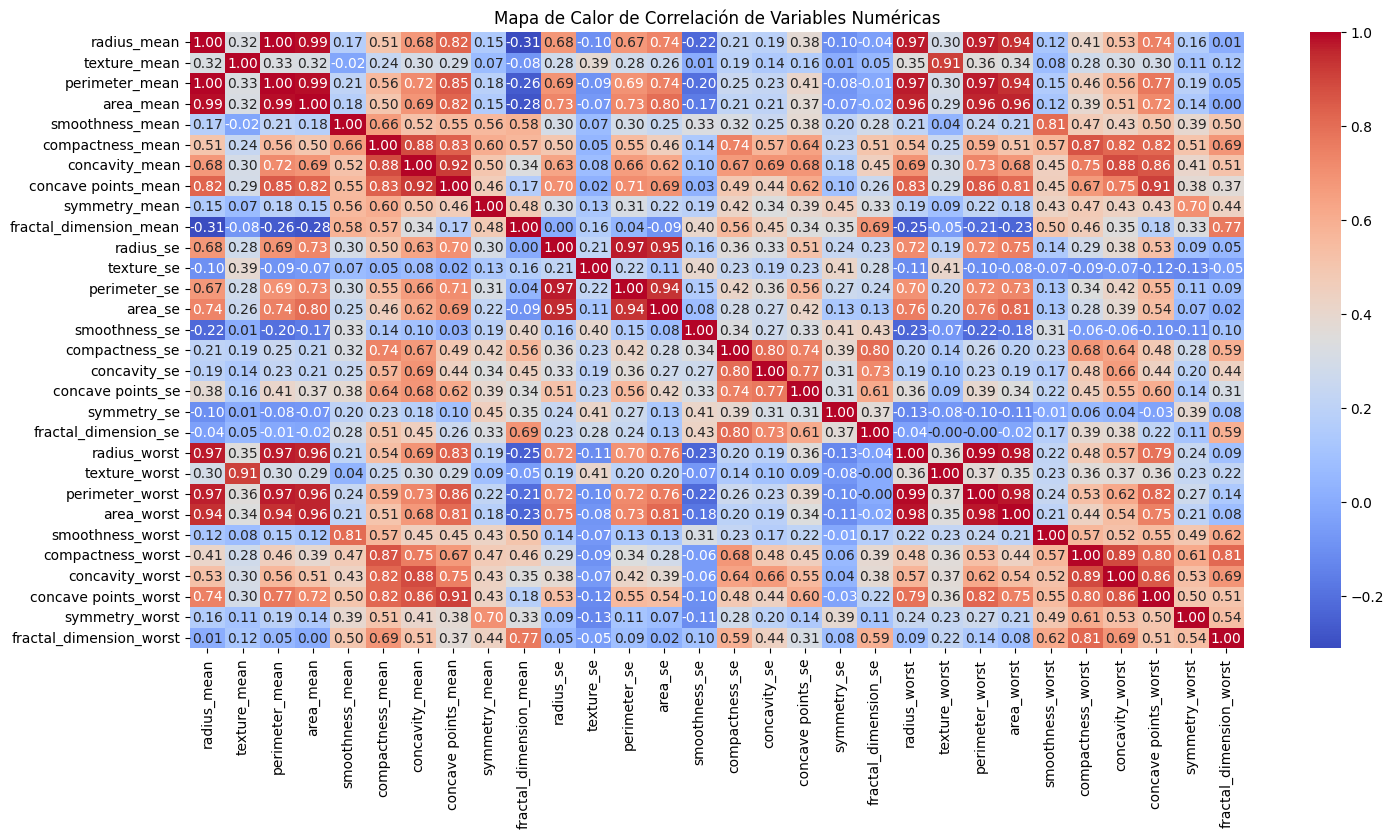

In [52]:
numerical_cols = data_df.select_dtypes(include=np.number).columns
plt.figure(figsize=(17, 8))
sns.heatmap(data_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlación de Variables Numéricas')
plt.show()

Si te fijas en los valores de correlación entre las variables `_mean` y `_worst` es evidente la multicolinearidad.

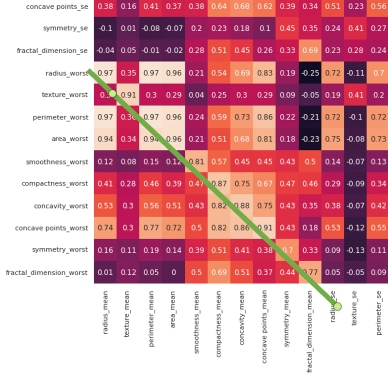

Por ejemplo, la columna `radius_mean` tiene una correlación de 0.97 con la columna `radius_worst`. Esto es algo inevitable, porque las columnas "peores" son esencialmente solo un subconjunto de las columnas "medias".

Para solucionar el problema numérico de la multicolinealidad, tradicionalmente se recurre a eliminar variables o efectuar análisis de componentes principales (PCA) con las `X`’s y usar los componentes como variables independientes en un modelo final.

Conduciremos esta actividad en esos dos sentidos.


# **Parte 2**. Modelo con eliminación de variables altamente correlacionadas  

Elimina las variables altamente correlacionadas:

3a) Ahora que sabes que las variables `_mean` y `_worst` tienen correlación alta, hay que quitar del dataframe un conjunto. Borra las columnas `_worst`.

In [53]:
# Identificar las columnas con '_worst' en su nombre
cols_to_drop = [col for col in data_df.columns if '_worst' in col]

# Eliminar las columnas identificadas del DataFrame
data_df = data_df.drop(columns=cols_to_drop)

# Mostrar las primeras filas del DataFrame resultante para verificar
data_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


3b. Entre las variables `_mean`, identifica patrones lineales con diagramas de dispersión usando:



```Python
sns.pairplot(data=data_df[['radius_mean',
        'texture_mean',
        'perimeter_mean',
        'area_mean',
        'smoothness_mean',
        'compactness_mean',
        'concavity_mean',
        'concave points_mean',
        'symmetry_mean',
        'fractal_dimension_mean']])
```




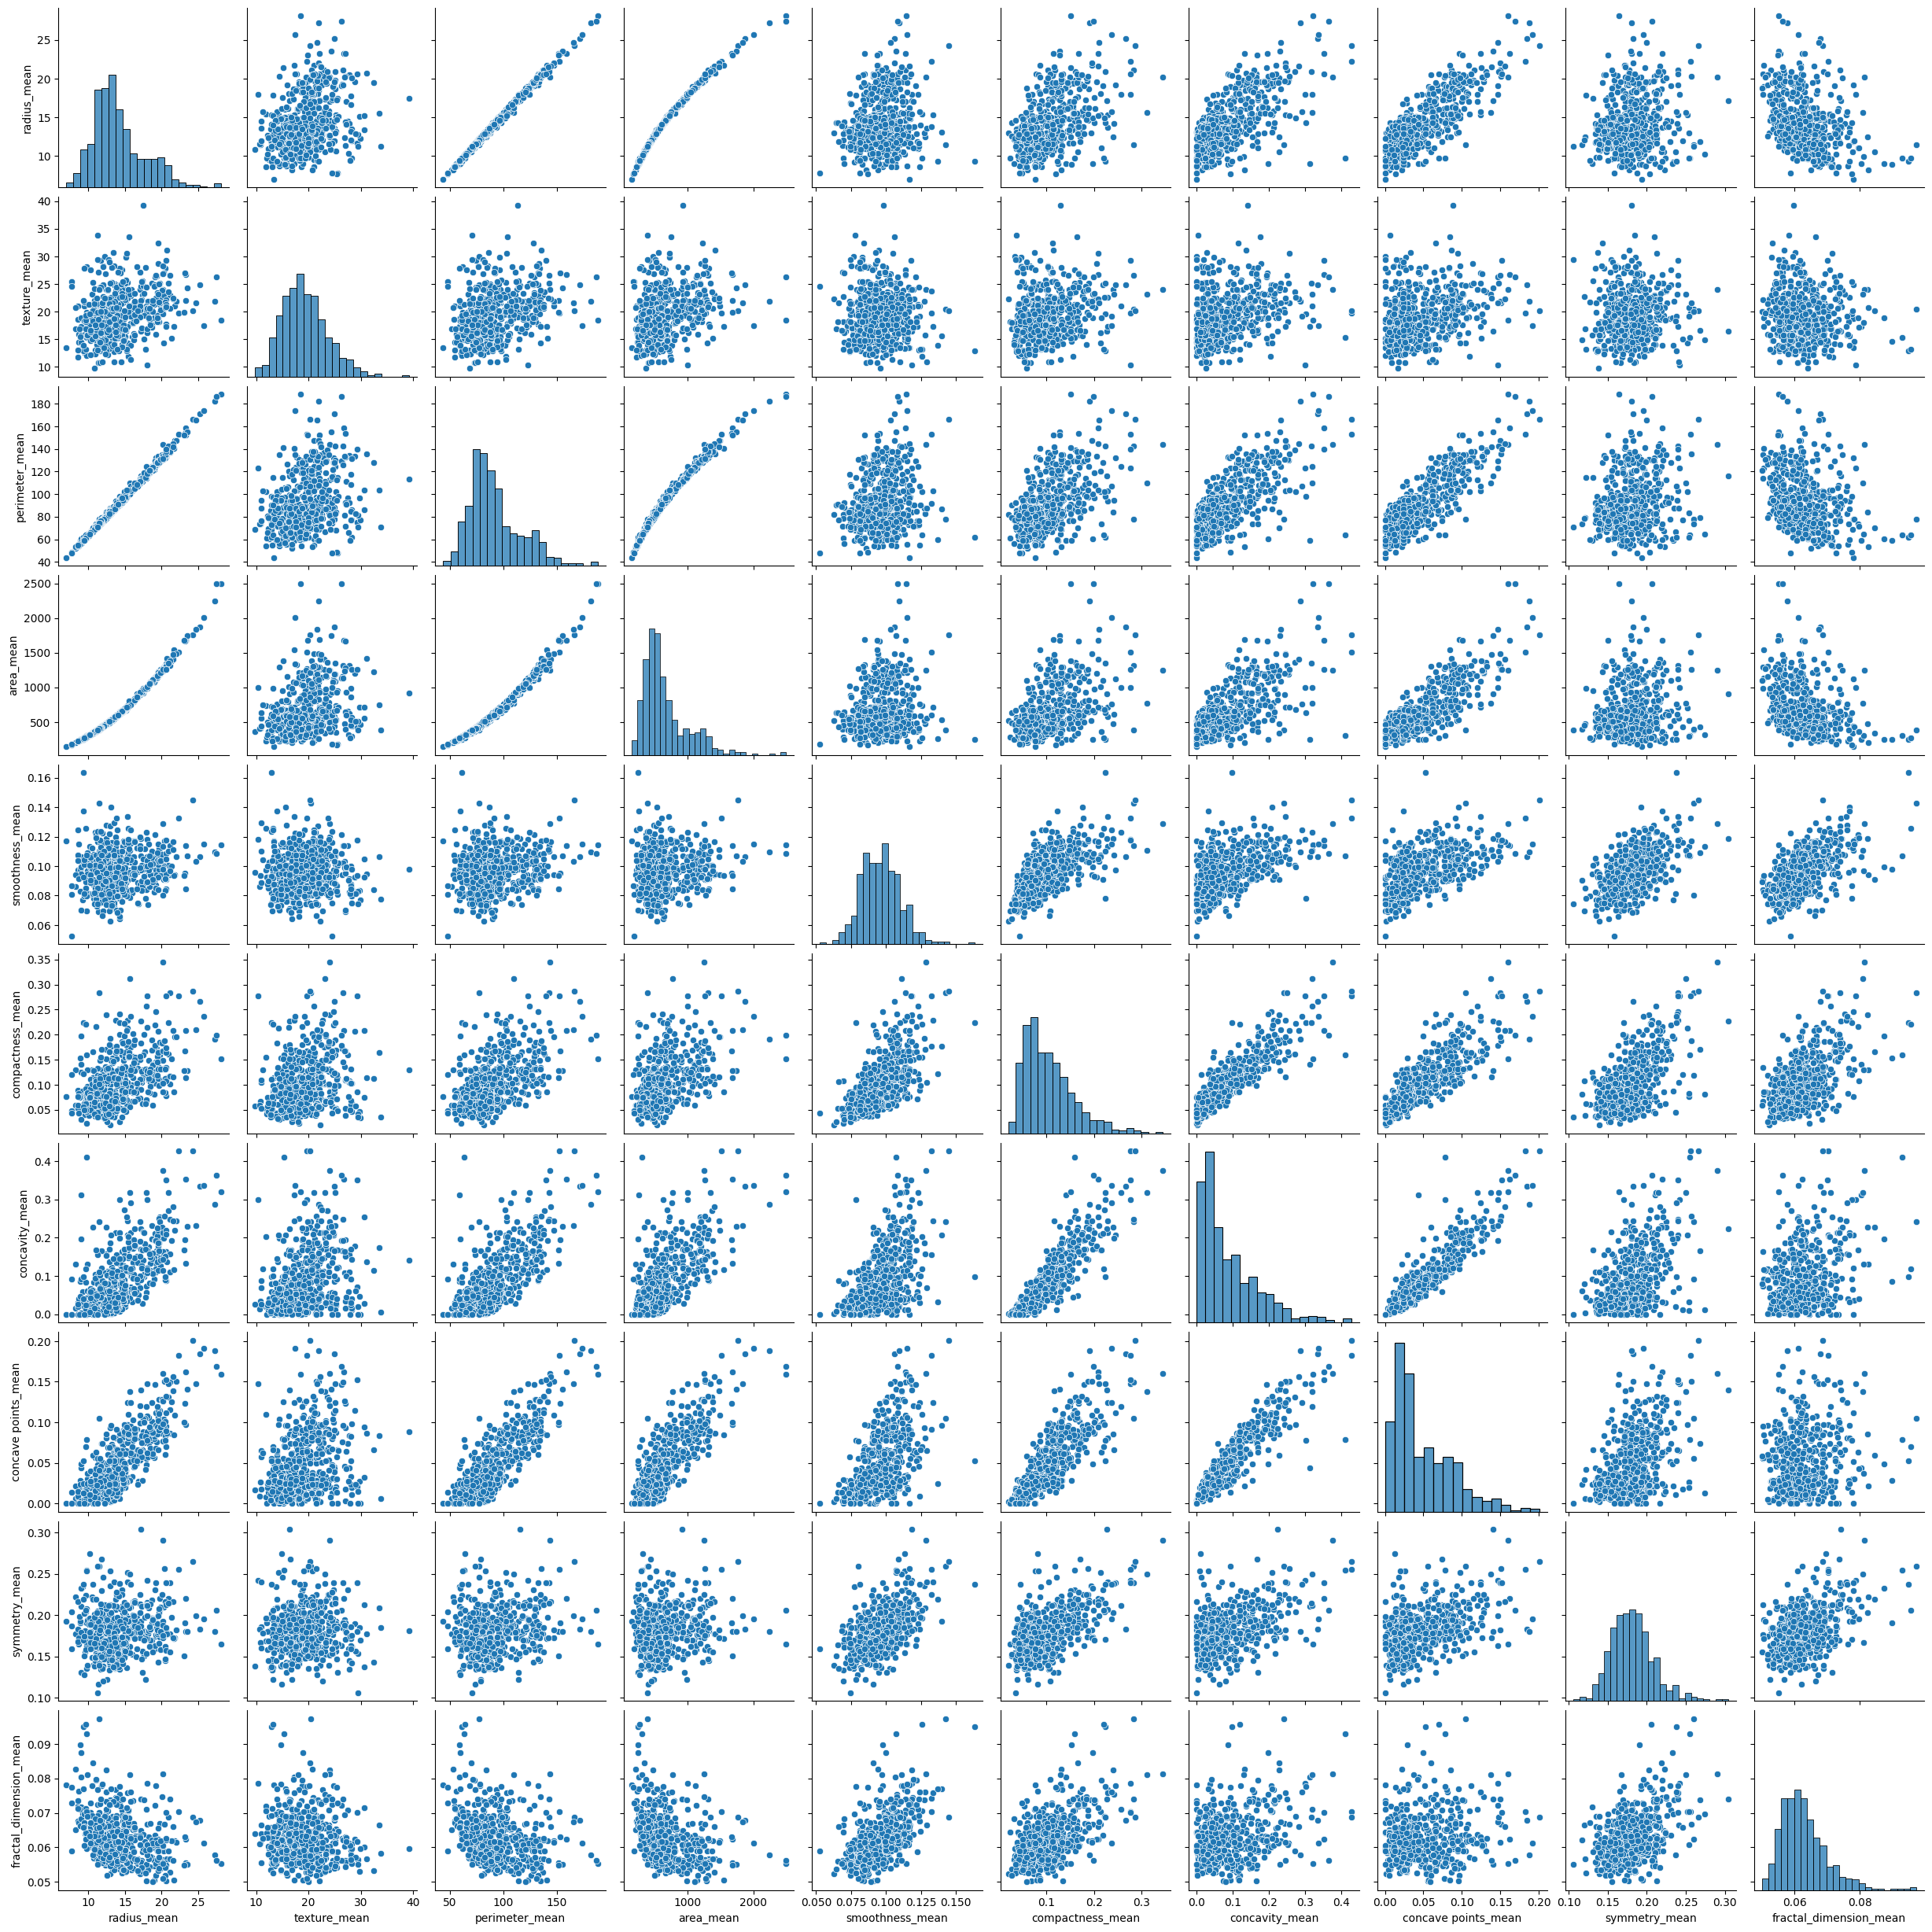

In [54]:
sns.pairplot(data=data_df[['radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'smoothness_mean',
    'compactness_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean']])

De la matriz podrás observar relaciones lineales bastante evidentes entre:


*   `radius_mean`, `perimeter_mean` y `area_mean`
*   `compactness_mean`, `concavity_mean`, `concave_points_mean`

Sabemos que el perímetro y el área de un círculo, se calculan a partir del radio. Entonces, la relación entre las primeras tres variables es muy clara para nosotros.

3c) Elabora otro mapa de calor confirmar con los valores de correlación.


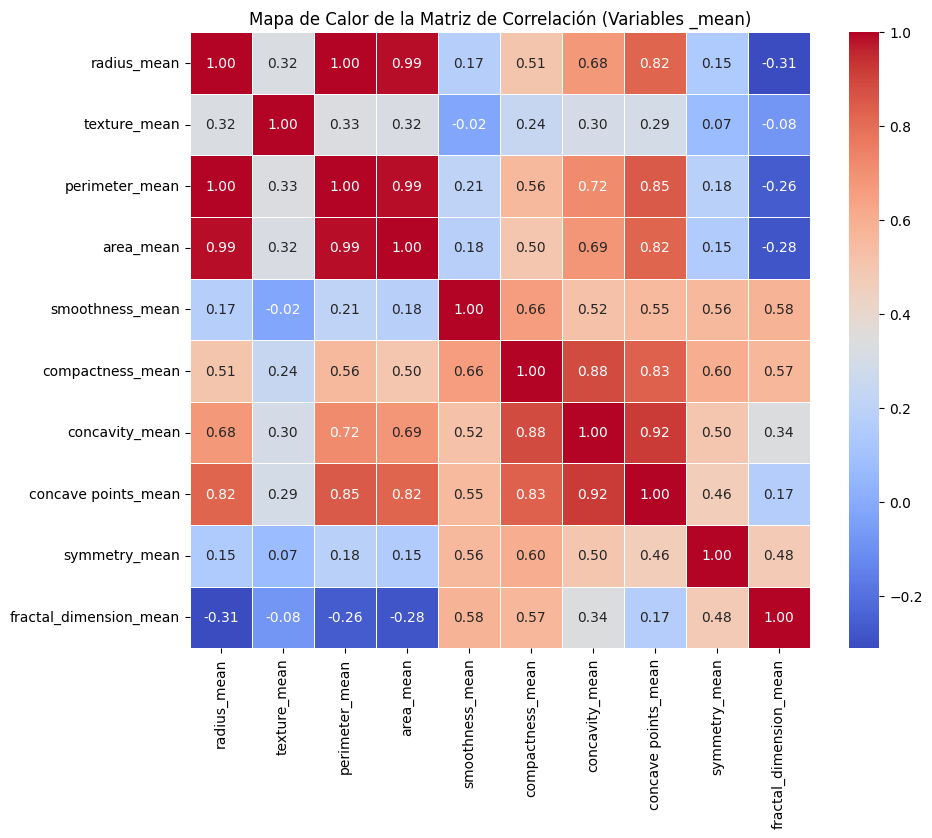

In [55]:
# Calcular la matriz de correlación para las variables con '_mean'
mean_cols = [col for col in data_df.columns if '_mean' in col]
correlation_matrix_mean = data_df[mean_cols].corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_mean, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de la Matriz de Correlación (Variables _mean)')
plt.show()

3d) Después de observar los valores, nos quedaremos con sólo una variable de cada trío: `radius_mean` y `compactness_mean`. Elimina las restantes, no sólo del conjunto `_mean`, sino también de `_se`.

In [56]:
mean_se_drop_columns = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
                'perimeter_se', 'area_se', 'concavity_se', 'concave points_se']
data_df.drop(columns=mean_se_drop_columns, inplace=True)

In [60]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   smoothness_mean         569 non-null    float64
 4   compactness_mean        569 non-null    float64
 5   symmetry_mean           569 non-null    float64
 6   fractal_dimension_mean  569 non-null    float64
 7   radius_se               569 non-null    float64
 8   texture_se              569 non-null    float64
 9   smoothness_se           569 non-null    float64
 10  compactness_se          569 non-null    float64
 11  symmetry_se             569 non-null    float64
 12  fractal_dimension_se    569 non-null    float64
dtypes: float64(12), object(1)
memory usage: 62.2+ KB


Observa la distribución de las variables resultantes (deben ser 12):

4a) Utilizando histogramas. Guarda en una variable (`skew_cols`) las que tengan marcado sesgo positivo. Para dar seguridad a tu selección, elige aquellas cuyo resultado de aplicar la función `skew()` sea mayor a 1.

Columnas con sesgo positivo (skew > 1): ['compactness_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se']


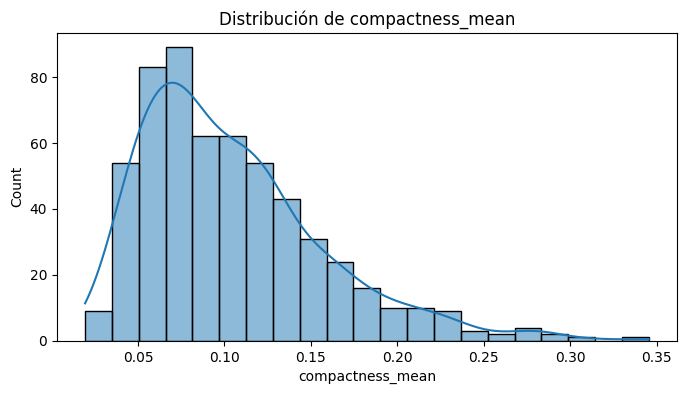

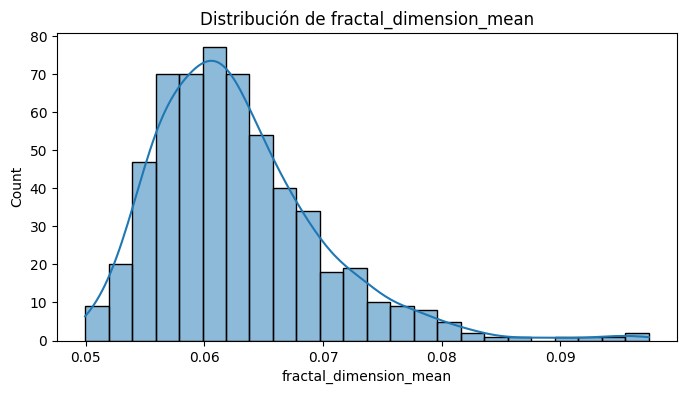

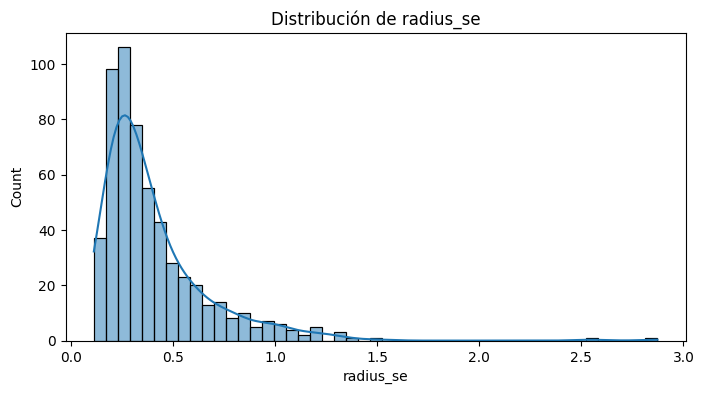

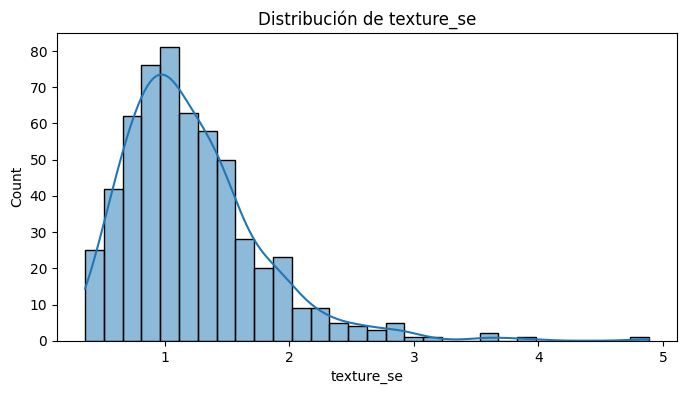

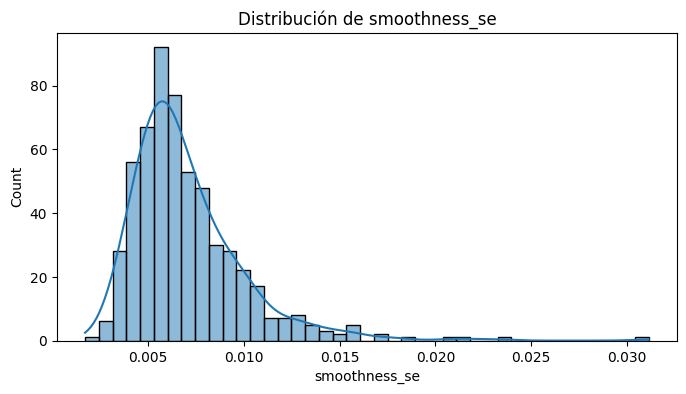

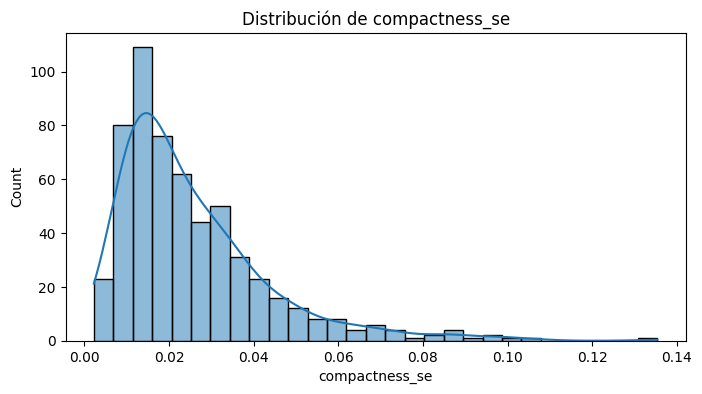

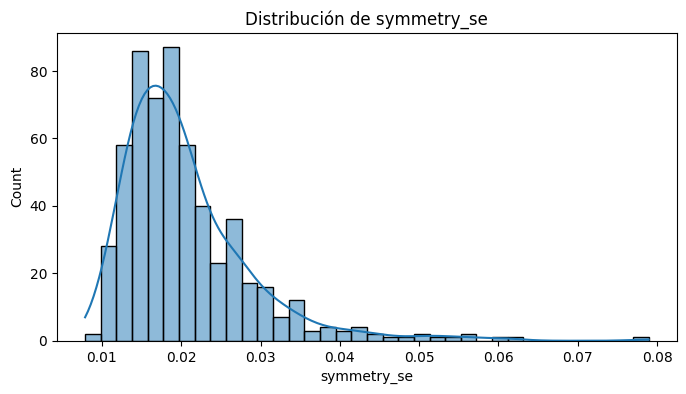

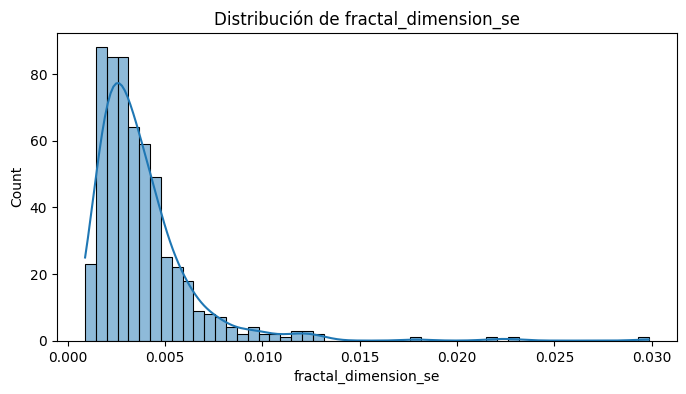

In [66]:
skewed_cols = data_df.skew(numeric_only=True)
skew_cols = skewed_cols[skewed_cols > 1].index.tolist()
print("Columnas con sesgo positivo (skew > 1):", skew_cols)

for col in skew_cols:
   plt.figure(figsize=(8, 4))
   sns.histplot(data_df[col], kde=True)
   plt.title(f'Distribución de {col}')
   plt.show()

4b) Dibujando box plots de todas las variables. Guarda en una variable (`scale_cols`) aquellas que no se encuentren en el intervalo [0,1]


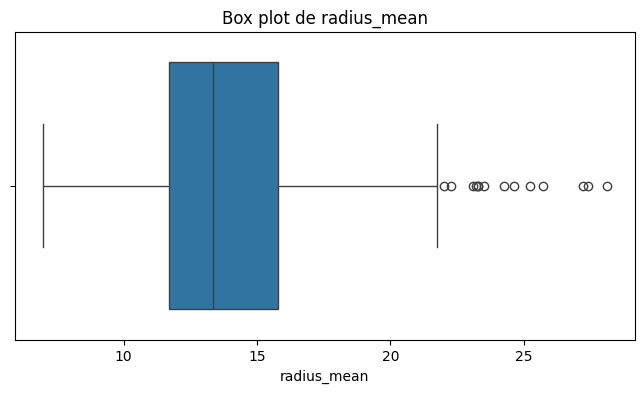

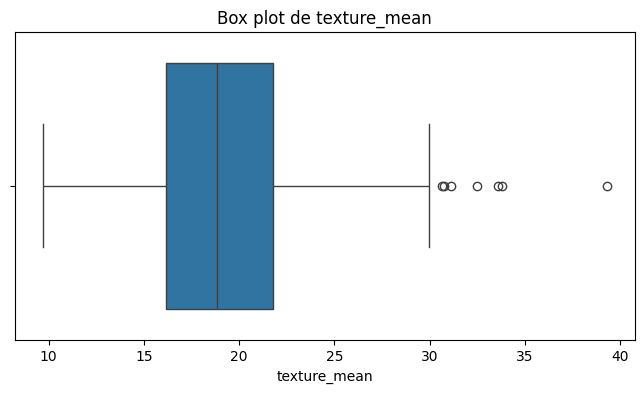

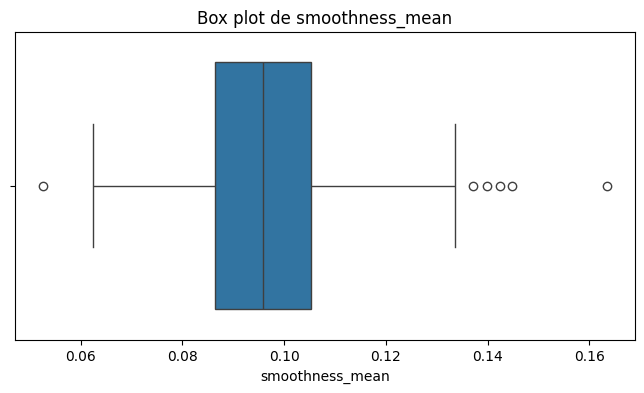

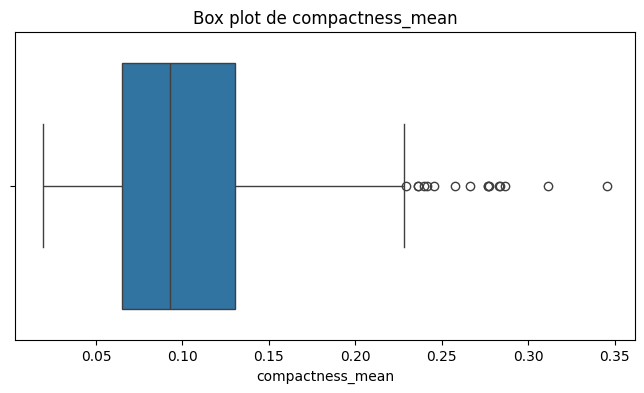

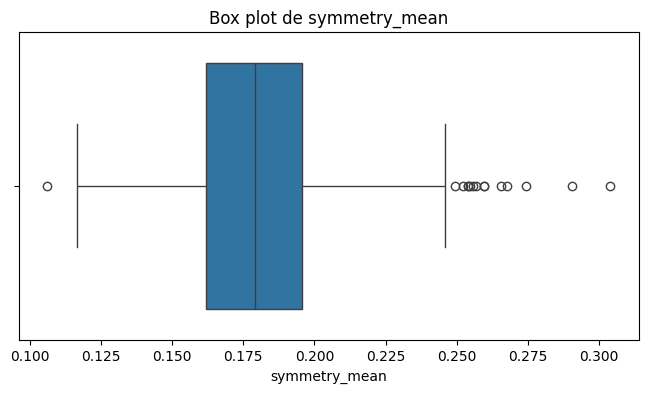

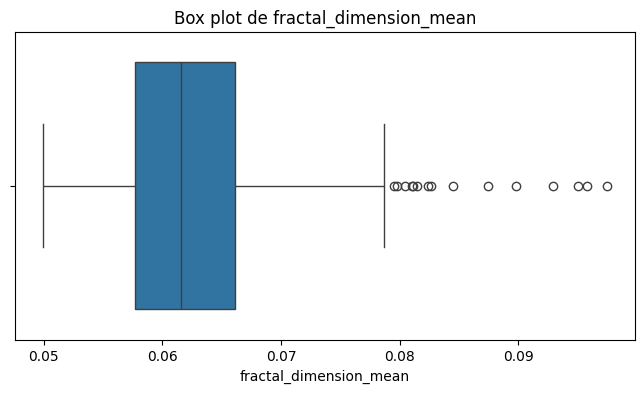

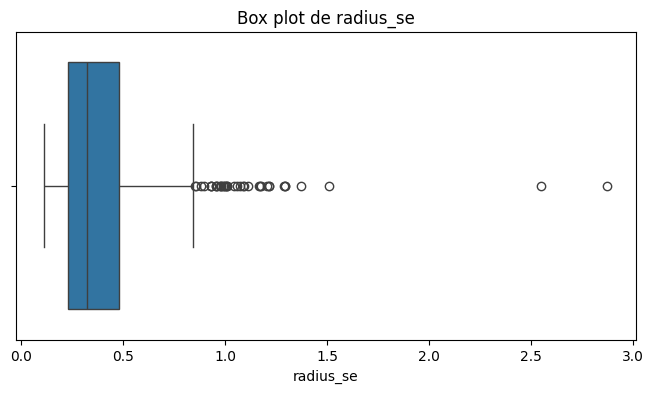

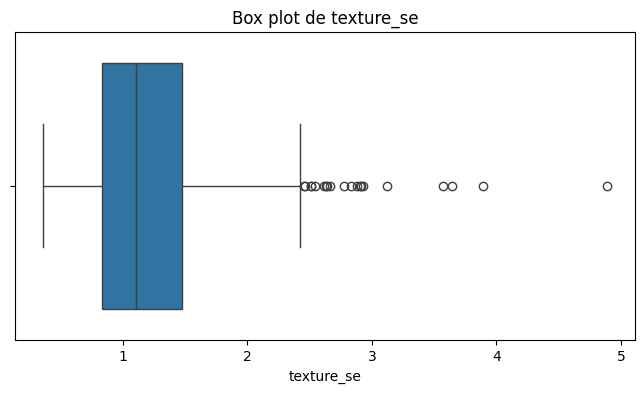

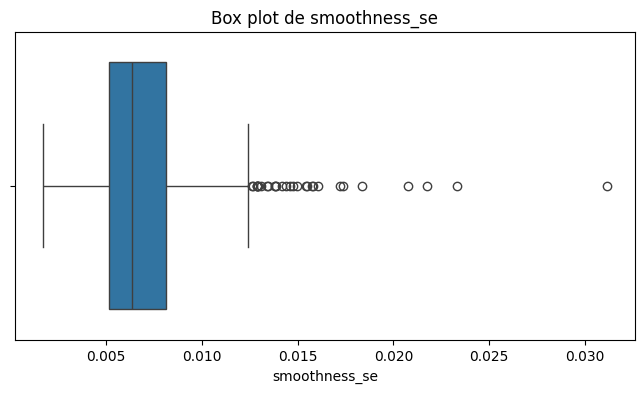

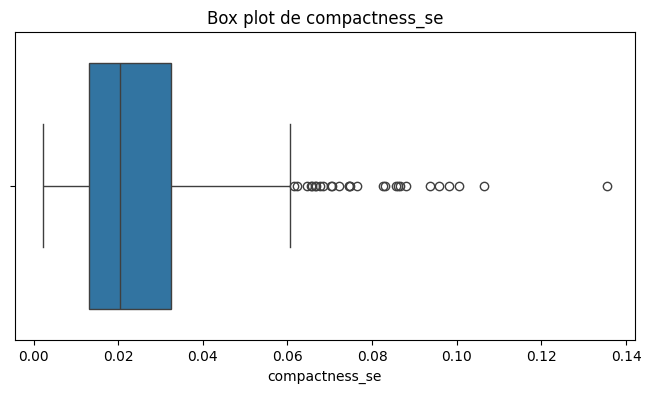

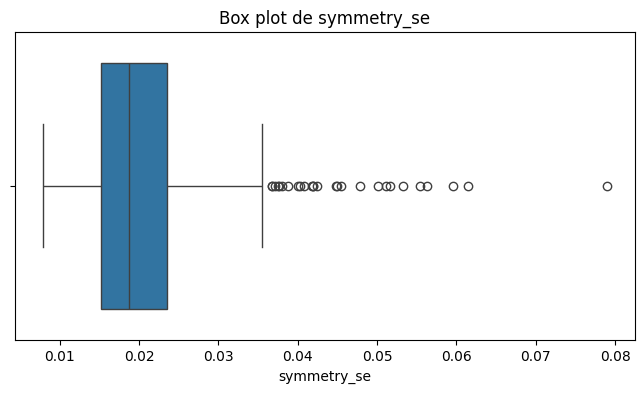

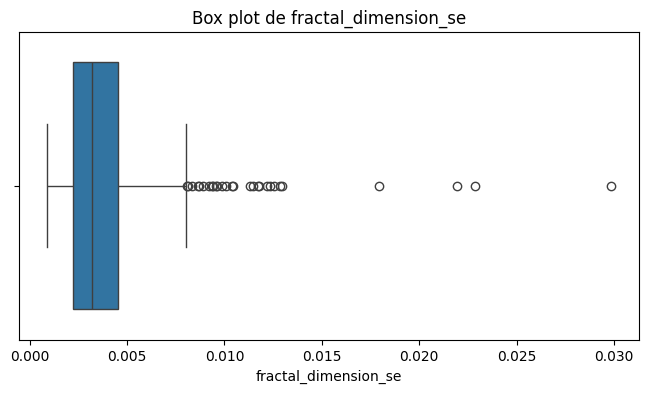

Columnas que no están en el intervalo [0, 1]: ['radius_mean', 'texture_mean', 'radius_se', 'texture_se']


In [67]:
scale_cols = []
for col in data_df.columns:
    if data_df[col].dtype in [np.float64, np.int64]: # Check only numeric columns
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=data_df[col])
        plt.title(f'Box plot de {col}')
        plt.show()

        # Check if the variable's range is outside [0, 1]
        min_val = data_df[col].min()
        max_val = data_df[col].max()
        if not (min_val >= 0 and max_val <= 1):
            scale_cols.append(col)

print("Columnas que no están en el intervalo [0, 1]:", scale_cols)

Con todo el análisis anterior, estamos listos para generar un modelo *baseline* denominado `logr_model`. Para ello:

5a) Vuelve a leer el contenido del archivo, haz que el `id` sea el índice y separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`diagnosis`). Divide el conjunto en entrenamiento y prueba (80:20) considerando el parámetro `random_state` con el valor de 1.

In [68]:
cancer_df = pd.read_csv('data.csv')
cancer_df.set_index('id', inplace=True)
cancer_df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [69]:
from sklearn.model_selection import train_test_split

X = cancer_df.drop('diagnosis', axis=1)
y = cancer_df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (455, 30)
Dimensiones de X_test: (114, 30)
Dimensiones de y_train: (455,)
Dimensiones de y_test: (114,)


5b) Prepara un transformador, denominado `preprocessing`, para borrar las columnas altamente correlacionadas (las 18 variables que se determinaron en los ejercicios previos) Asegúrate de incluir el parámetro `remainder='passthrough'` para mantener el resto de las variables.

In [72]:
from sklearn.compose import ColumnTransformer

original_X_cols = cancer_df.drop('diagnosis', axis=1).columns

# Columns dropped in step 3a (_worst)
cols_to_drop_worst = [col for col in original_X_cols if '_worst' in col]

# Columns dropped in step 3d (_mean/_se)
mean_se_drop_columns = ['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
                        'perimeter_se', 'area_se', 'concavity_se', 'concave points_se'] # Assuming concavity_points_se based on the pattern

# Combine the lists of columns to drop
all_cols_to_drop = list(set(cols_to_drop_worst + mean_se_drop_columns)) # Use set to avoid duplicates

print(f"Identified {len(all_cols_to_drop)} columns to drop in the transformer.")
print(f"Columns to drop: {all_cols_to_drop}")


# Create the list of columns to keep (those NOT in all_cols_to_drop)
cols_to_keep = [col for col in original_X_cols if col not in all_cols_to_drop]


preprocessing = ColumnTransformer(
    transformers=[
        ('drop_correlated', 'drop', all_cols_to_drop)
    ],
    remainder='passthrough' # Keep the rest of the columns
)

print("\nColumnTransformer 'preprocessing' created.")
preprocessing

Identified 18 columns to drop in the transformer.
Columns to drop: ['area_mean', 'concavity_mean', 'radius_worst', 'fractal_dimension_worst', 'perimeter_se', 'area_se', 'area_worst', 'perimeter_worst', 'texture_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'concave points_mean', 'concavity_se', 'concave points_se', 'concave points_worst', 'perimeter_mean', 'smoothness_worst']

ColumnTransformer 'preprocessing' created.


ColumnTransformer(remainder='passthrough',
                  transformers=[('drop_correlated', 'drop',
                                 ['area_mean', 'concavity_mean', 'radius_worst',
                                  'fractal_dimension_worst', 'perimeter_se',
                                  'area_se', 'area_worst', 'perimeter_worst',
                                  'texture_worst', 'compactness_worst',
                                  'concavity_worst', 'symmetry_worst',
                                  'concave points_mean', 'concavity_se',
                                  'concave points_se', 'concave points_worst',
                                  'perimeter_mean', 'smoothness_worst'])])

5c) Entrena el modelo `logr_model` con el transformador `preprocessing` y  regresión logística.

Como la salida `y` está en términos de las etiquetas `'B'` y `'M'`, en lugar de 0 y 1, para evaluar el modelo en el conjunto de prueba deberás especificar la clase positiva. En el caso de la matriz de confusión, indica el orden de las etiquetas con `labels=['B','M']`, porque `'B'` es la clase negativa (ésta se especifica primero) y `'M'` la positiva. Para las métricas de *recall* y *precision*, utiliza el parámetro `pos_label='M'`. Como *accuracy* ocupa la suma de ambas clases y el total de las observaciones, no requiere ninguna especificación. Si quisieras omitir estos parámetros, tendrías que sustituir `'B'` por 0 y `'M'` por 1, previo a la construcción del modelo.

In [75]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# Define the logistic regression model
logr = LogisticRegression(solver='liblinear', random_state=1) # Using liblinear as it's good for small datasets

# Create the pipeline: first preprocess, then train the logistic regression model
logr_model = Pipeline(steps=[('preprocessor', preprocessing),
                             ('classifier', logr)])

# Train the model
logr_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = logr_model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred, labels=['B', 'M']) # Specify labels for confusion matrix
recall = recall_score(y_test, y_pred, pos_label='M') # Specify positive label for recall
precision = precision_score(y_test, y_pred, pos_label='M') # Specify positive label for precision

print(f"\nResultados prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Recall (Clase Positiva 'M'): {recall:.4f}")
print(f"Precision (Clase Positiva 'M'): {precision:.4f}")


Resultados prueba:
Accuracy: 0.8860
Matriz de Confusión:
[[71  1]
 [12 30]]
Recall (Clase Positiva 'M'): 0.7143
Precision (Clase Positiva 'M'): 0.9677


Para generar un modelo `logr_model2` con transformación y escalamiento:

6a) Modifica el transformador anterior para, además del borrado de las columnas correlacionadas, aplicar la raíz cuadrada a los predictores con sesgo (previamente almacenados en `skew_cols`) y escalamiento *MinMax* a los predictores con escala mayor a 1 (previamente almacenados en `scale_cols`) Como no todos los predictores serán eliminados o transformados, asegúrate de incluir el parámetro `remainder='passthrough'`

In [76]:
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer

# Create the transformer for square root
sqrt_transformer = FunctionTransformer(np.sqrt, validate=False)

# Create the transformer for MinMax scaling
minmax_scaler = MinMaxScaler()

# Create the new ColumnTransformer including dropping, sqrt, and MinMax scaling
preprocessing_v2 = ColumnTransformer(
    transformers=[
        ('drop_correlated', 'drop', all_cols_to_drop), # Dropping correlated columns
        ('sqrt_transform', sqrt_transformer, skew_cols), # Applying square root to skewed columns
        ('minmax_scale', minmax_scaler, scale_cols)     # Applying MinMax scaling to scale columns
    ],
    remainder='passthrough' # Keep the rest of the columns
)

print("\nColumnTransformer 'preprocessing_v2' created.")
preprocessing_v2


ColumnTransformer 'preprocessing_v2' created.


ColumnTransformer(remainder='passthrough',
                  transformers=[('drop_correlated', 'drop',
                                 ['area_mean', 'concavity_mean', 'radius_worst',
                                  'fractal_dimension_worst', 'perimeter_se',
                                  'area_se', 'area_worst', 'perimeter_worst',
                                  'texture_worst', 'compactness_worst',
                                  'concavity_worst', 'symmetry_worst',
                                  'concave points_mean', 'concavity_se',
                                  'concave points_se', 'concave points_worst',
                                  'perimeter_mean', 'smoothness_worst']),
                                ('sqrt_transform',
                                 FunctionTransformer(func=<ufunc 'sqrt'>),
                                 ['compactness_mean', 'fractal_dimension_mean',
                                  'radius_se', 'texture_se', 'smoothness_se',
                                  'compactness_se', 'symmetry_se',
                                  'fractal_dimension_se']),
                                ('minmax_scale', MinMaxScaler(),
                                 ['radius_mean', 'texture_mean', 'radius_se',
                                  'texture_se'])])

6b) Entrena el modelo `logr_model2` con regresión logística, aplicando previamente el transformador modificado. Evalúa el modelo en el conjunto de prueba con las mismas métricas.

In [77]:
# Define the logistic regression model (same as before)
logr2 = LogisticRegression(solver='liblinear', random_state=1)

# Create the pipeline using the modified preprocessor
logr_model2 = Pipeline(steps=[('preprocessor', preprocessing_v2),
                              ('classifier', logr2)])

# Train the model
logr_model2.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred2 = logr_model2.predict(X_test)

# Calculate metrics
accuracy2 = accuracy_score(y_test, y_pred2)
conf_matrix2 = confusion_matrix(y_test, y_pred2, labels=['B', 'M'])
recall2 = recall_score(y_test, y_pred2, pos_label='M')
precision2 = precision_score(y_test, y_pred2, pos_label='M')

print(f"\nResultados prueba para logr_model2:")
print(f"Accuracy: {accuracy2:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix2}")
print(f"Recall (Clase Positiva 'M'): {recall2:.4f}")
print(f"Precision (Clase Positiva 'M'): {precision2:.4f}")


Resultados prueba para logr_model2:
Accuracy: 0.9035
Matriz de Confusión:
[[72  0]
 [11 31]]
Recall (Clase Positiva 'M'): 0.7381
Precision (Clase Positiva 'M'): 1.0000


# **Parte 3**. Modelo con aplicación de PCA

7. Analizaremos el efecto de aplicar PCA a todas las variables. Recuerda que previo a aplicarlo es recomendado escalar todas las variables. Utiliza la clase `StandardScaler` para transformar `X`.

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Apply StandardScaler to the full dataset X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X scaled successfully.")
print("Shape of X_scaled:", X_scaled.shape)

X scaled successfully.
Shape of X_scaled: (569, 30)


8. Aplica PCA al conjunto escalado y determina el número de componentes que explican el 99% de la varianza.

Explained variance ratio by each component:
[4.42720256e-01 1.89711820e-01 9.39316326e-02 6.60213492e-02
 5.49576849e-02 4.02452204e-02 2.25073371e-02 1.58872380e-02
 1.38964937e-02 1.16897819e-02 9.79718988e-03 8.70537901e-03
 8.04524987e-03 5.23365745e-03 3.13783217e-03 2.66209337e-03
 1.97996793e-03 1.75395945e-03 1.64925306e-03 1.03864675e-03
 9.99096464e-04 9.14646751e-04 8.11361259e-04 6.01833567e-04
 5.16042379e-04 2.72587995e-04 2.30015463e-04 5.29779290e-05
 2.49601032e-05 4.43482743e-06]

Cumulative explained variance ratio:
[0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881 0.961366   0.97007138
 0.97811663 0.98335029 0.98648812 0.98915022 0.99113018 0.99288414
 0.9945334  0.99557204 0.99657114 0.99748579 0.99829715 0.99889898
 0.99941502 0.99968761 0.99991763 0.99997061 0.99999557 1.        ]

Number of components explaining 99% of variance: 17


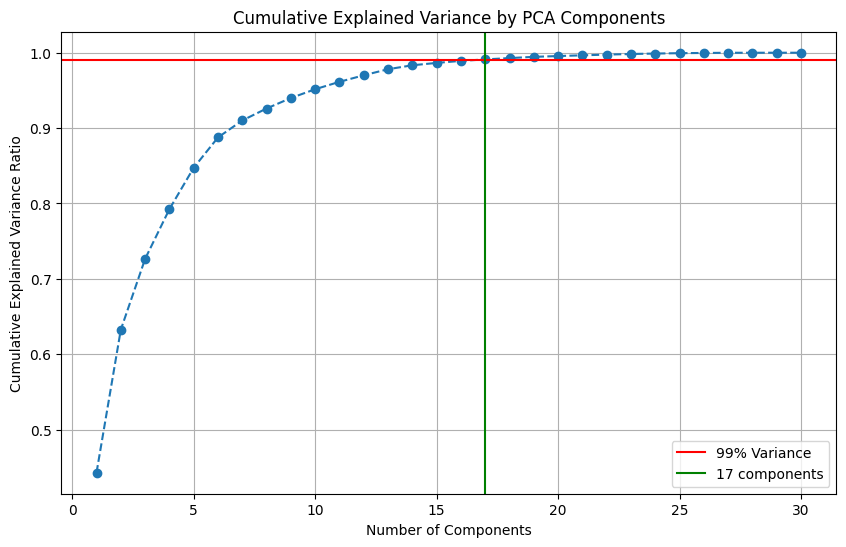

In [79]:

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Calculate the cumulative sum of explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components that explain 99% of the variance
n_components_99 = np.argmax(cumulative_variance_ratio >= 0.99) + 1 # +1 because argmax returns the index (0-based)

print(f"Explained variance ratio by each component:\n{pca.explained_variance_ratio_}")
print(f"\nCumulative explained variance ratio:\n{cumulative_variance_ratio}")
print(f"\nNumber of components explaining 99% of variance: {n_components_99}")

# Optional: Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.99, color='r', linestyle='-', label='99% Variance')
plt.axvline(x=n_components_99, color='g', linestyle='-', label=f'{n_components_99} components')
plt.legend()
plt.grid(True)
plt.show()

9. Con el número de componentes determinado, estamos listos para generar un modelo `logr_model3` con PCA. Construye un pipeline que incluya el escalamiento estándar, el PCA con el número de componentes determinado y regresión logística. Entrena el modelo utilizando el  conjunto de entrenamiento y evalúalo en el conjunto de prueba con las mismas métricas.

In [80]:
n_components_determined = n_components_99 # Use the variable from the previous step

# Define the logistic regression model (same as before)
logr3 = LogisticRegression(solver='liblinear', random_state=1)

# Create the pipeline including Standard Scaling, PCA, and Logistic Regression
logr_model3 = Pipeline(steps=[('scaler', StandardScaler()), # Step 1: Scale the data
                              ('pca', PCA(n_components=n_components_determined)), # Step 2: Apply PCA with determined components
                              ('classifier', logr3)]) # Step 3: Train Logistic Regression

# Train the pipeline model using the training set
logr_model3.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred3 = logr_model3.predict(X_test)

# Calculate metrics
accuracy3 = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3, labels=['B', 'M'])
recall3 = recall_score(y_test, y_pred3, pos_label='M')
precision3 = precision_score(y_test, y_pred3, pos_label='M')

print(f"\nResultados prueba para logr_model3 (PCA):")
print(f"Accuracy: {accuracy3:.4f}")
print(f"Matriz de Confusión:\n{conf_matrix3}")
print(f"Recall (Clase Positiva 'M'): {recall3:.4f}")
print(f"Precision (Clase Positiva 'M'): {precision3:.4f}")


Resultados prueba para logr_model3 (PCA):
Accuracy: 0.9825
Matriz de Confusión:
[[72  0]
 [ 2 40]]
Recall (Clase Positiva 'M'): 0.9524
Precision (Clase Positiva 'M'): 1.0000


10. En un modelo de diagnóstico médico, ¿cuál consideras que es la métrica más importante? ¿Cómo cambiarías (disminuir/aumentar) el *threshold*? ¿Por qué?

# En un modelo de diagnóstico médico, donde el objetivo es identificar correctamente a los pacientes con la enfermedad (clase positiva 'M'), la métrica más importante es  el **Recall (Sensibilidad)**.

# **Recall** mide la proporción de casos positivos reales que fueron identificados correctamente por el modelo.
# En el contexto médico, un alto Recall significa que el modelo tiene una alta capacidad para detectar a las personas que realmente tienen la enfermedad,
# minimizando los Falsos Negativos (pacientes enfermos que son diagnosticados como sanos).
# Un Falso Negativo en un diagnóstico médico puede tener consecuencias graves, como un retraso en el tratamiento.

# La **Precision** también es importante, ya que mide la proporción de diagnósticos positivos del modelo que son correctos.
# Un Falso Positivo (paciente sano diagnosticado como enfermo) puede llevar a tratamientos y costos innecesarios.

# **¿Cómo cambiarías (disminuir/aumentar) el threshold? ¿Por qué?**


# Para **aumentar el Recall** en un modelo de diagnóstico médico disminuiría el threshold**.

# **¿Por qué disminuir el threshold para aumentar el Recall?**
# Al disminuir el threshold (por ejemplo, de 0.5 a 0.3), hacemos que el modelo sea más sensible a clasificar una instancia como positiva ('M').
# Esto significa que se requerirá una menor confianza por parte del modelo para predecir 'M'.
# Efectos de disminuir el threshold:
# 1. **Aumento de Verdaderos Positivos (TP):** Más pacientes enfermos (que antes estaban justo por debajo del umbral de 0.5) serán clasificados correctamente como 'M'.
# 2. **Aumento de Falsos Positivos (FP):** También es probable que más pacientes sanos (cuya probabilidad predicha estaba por encima del nuevo umbral bajo pero por debajo del original) sean clasificados incorrectamente como 'M'.
# 3. **Disminución de Falsos Negativos (FN):** Menos pacientes enfermos serán clasificados incorrectamente como 'B'. Esto es el objetivo principal para aumentar el Recall.

